In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import numpy as np
from tensorflow.keras import optimizers
import tensorflow.keras as keras
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from sklearn.preprocessing import MinMaxScaler
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import RMSprop, SGD
from tensorflow.keras import initializers
import keras.backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import sys

from google.colab import files
uploaded = files.upload()


Saving Round 3 Unbiased.csv to Round 3 Unbiased.csv


In [ ]:
def load_knn_data():
  X_train = np.genfromtxt('Round 3 Unbiased.csv', delimiter=',')
  np.random.shuffle(X_train)
  Y_train_S = X_train[:,6]
  X_train_S = X_train[:,0:6]
  return X_train_S, Y_train_S

In [ ]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
X , Y = load_knn_data() 
data = asarray(X)
# print(data)
scaler =  MinMaxScaler()
scaled = scaler.fit_transform(data)
print(scaled)
print(Y)

[[0.24431079 0.27788784 0.56531578 0.57479249 0.84070796 0.93137255]
 [0.10853001 0.13316811 0.16334088 0.30405604 0.15929204 0.12745098]
 [0.56496765 0.76883366 0.86011109 0.78512981 0.90265487 0.97058824]
 ...
 [0.23745164 0.26958305 0.54309813 0.56313652 0.83185841 0.92156863]
 [0.19158318 0.21228696 0.40279778 0.47871902 0.44247788 0.58823529]
 [0.35015458 0.61313626 0.75375437 0.70194855 0.87610619 0.95098039]]
[1. 0. 1. ... 1. 0. 1.]


In [ ]:
X , Y = load_knn_data() 
print(Y)
print(scaled)

[1. 1. 1. ... 0. 1. 1.]
[[0.24431079 0.27788784 0.56531578 0.57479249 0.84070796 0.93137255]
 [0.10853001 0.13316811 0.16334088 0.30405604 0.15929204 0.12745098]
 [0.56496765 0.76883366 0.86011109 0.78512981 0.90265487 0.97058824]
 ...
 [0.23745164 0.26958305 0.54309813 0.56313652 0.83185841 0.92156863]
 [0.19158318 0.21228696 0.40279778 0.47871902 0.44247788 0.58823529]
 [0.35015458 0.61313626 0.75375437 0.70194855 0.87610619 0.95098039]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, Y, test_size=0.1, random_state=0)
print(X_train.shape)
# print(X_val.shape)
print(y_train)
# print(X_train)


(3482, 6)
[1. 0. 0. ... 0. 0. 1.]


In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
# opt = keras.optimizers.RMSprop(lr=0.001, decay=1e-6)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=300, verbose=1)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
12/12 [==============================] - 1s 29ms/step - loss: 0.7373 - accuracy: 0.4977 - val_loss: 0.7190 - val_accuracy: 0.5375
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 0.7142 - accuracy: 0.5053 - val_loss: 0.7069 - val_accuracy: 0.5530
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 0.7021 - accuracy: 0.5097 - val_loss: 0.7028 - val_accuracy: 0.4910
Epoch 4/500
12/12 [==============================] - 0s 7ms/step - loss: 0.6980 - accuracy: 0.50

In [ ]:
model = Sequential()
model.add(Dense(25, input_dim=6, activation='relu', kernel_initializer='he_normal'))
# model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
opt = keras.optimizers.RMSprop(lr=0.001, decay=1e-6)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=20, verbose=1)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                175       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 702
Trainable params: 702
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
182/182 [==============================] - 2s 5ms/step - loss: 3097.6005 - accuracy: 0.4996 - val_loss: 62.3110 - val_accuracy: 0.5186
Epoch 2/100
182/182 [==============================] - 1s 3ms/step - loss: 444.1110 - accuracy: 0.5098 - val_

In [ ]:
import pandas as pd

pred = model.predict_generator(X_test,verbose=1)
pred_labels = model.predict_classes(X_test,verbose=1)
print(pred)
print(pred_labels)
print(y_test)
print(X_test)
predicted_class_indices=np.argmax(pred,axis=1)
# print(predicted_class_indices)
# Prob = pd.Series(pred)
Label = pd.Series(y_test)
Data = pd.DataFrame(X_test, columns =['FName', 'LName', 'Age','aa','aaa','aaaaa'], 
                                           dtype = float)  

Label.to_csv("classification.csv",index=False)
Data.to_csv("classification2.csv",index=False)

13/13 [==============================] - 0s 1ms/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[0.48353496]
 [0.50942594]
 [0.48148218]
 [0.50621456]
 [0.5116758 ]
 [0.5170016 ]
 [0.5110285 ]
 [0.48655888]
 [0.51534104]
 [0.5091932 ]
 [0.48454738]
 [0.51512843]
 [0.5115004 ]
 [0.5083582 ]
 [0.506237  ]
 [0.50762343]
 [0.5060426 ]
 [0.50766426]
 [0.48294523]
 [0.5123879 ]
 [0.50725126]
 [0.5097631 ]
 [0.5094035 ]
 [0.5063008 ]
 [0.5069233 ]
 [0.5124977 ]
 [0.486762  ]
 [0.48266512]
 [0.50944066]
 [0.52592486]
 [0.48874563]
 [0.49286932]
 [0.50983226]
 [0.48451602]
 [0.5368487 ]
 [0.49449325]
 [0.51073855]
 [0.5062863 ]
 [0.5138571 ]
 [0.50818306]
 [0.48892343]
 [0.5339851 ]
 [0.5121993 ]
 [0.5152696 ]
 [0.50631714]
 [0.5062208 ]
 [0.48282248]
 [0.529864  ]
 [0.52171   ]
 [0.50466734]
 [0.48459953]
 [0.5070411 ]
 [0.48483673]
 [0.5094231 ]
 [0.48134765]
 [0.51512015]
 [0.5121094 ]
 [0.5106154 ]
 [0.48153266]
 [0.48874533]
 [0.5300944 ]
 [0.53308254]
 [0.5082137 ]
 [0.5122311 ]
 [0.4867276 ]
 [0.5149178 ]
 [0.49107218]
 [0.51091164]
 [0.48671144]
 [0.5060244 ]
 [0.5328666 ]
 [0.51

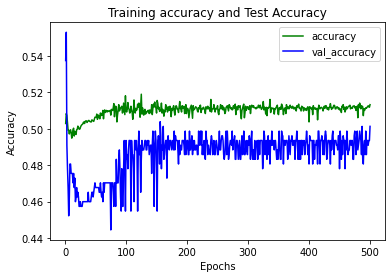

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1,501)
plt.plot(epochs, accuracy, 'g', label='accuracy')
plt.plot(epochs, val_accuracy, 'b', label='val_accuracy')
plt.title('Training accuracy and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()